# 夹具寿命数据分析

In [1]:
import pandas as pd

def loadfilepd(filename):
    df = pd.read_excel(filename)
    entity_id = df['EntityID']#选择标签，也就是表格对应列的第一行元素
    code=df['Code']
    used_count = df['UsedCount'] 
    reg_date = df['RegDate']
    scrap_date = df['ScrDate']
    life_cycle=df['LifeCycle']
    repairs=df['Repairs']
    
    return entity_id,code,used_count,reg_date,scrap_date,life_cycle,repairs

#opened_file = open('夹具相关数据.xlsx')
#from xlsx import reader
#print("请将文件和代码放在一个文件夹中")
name = input("(请输入文件名，不包含文件扩展名，就是不用加.xlsx) : ")#数据文件和代码块在一个文件夹中
read_file = name + ".xlsx"
entity_id,code,used_count,reg_date,scrap_date,life_cycle,repairs=loadfilepd(read_file)
#read_file = reader(opened_file)

Entity_id=[]
Used_count = []
Scrap_date =[]
Code=[]
Reg_date=[]
Life_cycle=[]
Repairs=[]
c = input("请输入要查询夹具的code：")
for num in range(len(entity_id)):
    if code[num]==c:
        Code.append(code[num])
        Entity_id.append(entity_id[num])
        Used_count.append(used_count[num])
        Scrap_date.append(scrap_date[num])
        Reg_date.append(reg_date[num])
        Repairs.append(repairs[num])
        Life_cycle.append(life_cycle[num])

goodlist=[Entity_id,Code,Used_count,Reg_date,Scrap_date,Life_cycle,Repairs]

dfr = pd.DataFrame(goodlist)
dfr = pd.DataFrame(dfr.values.T,index=dfr.columns,columns=dfr.index)

dfr.columns = ["Entity_id","Code","Used_count","Reg_date","Scrap_date","Life_cycle","Repairs"]
outputfilename = name+"1.xlsx"
dfr.to_excel(outputfilename)

print('筛选完成')
print('输出文件为：',outputfilename)

(请输入文件名，不包含文件扩展名，就是不用加.xlsx) : 夹具相关数据
请输入要查询夹具的code：EF2185
筛选完成
输出文件为： 夹具相关数据1.xlsx


### 数据清洗
我们将已有的模拟数据进行清洗
* 原始数据
![image](images\原始模拟数据.jpg)
  1. 去除使用次数较小的夹具数据，通过对数据的观察，发现部分夹具使用次数较少还未报废，所以我们将使用次数的区间下限设定为50次，即删除夹具使用次数在50次以下的数据。
  2. 删除无报废日期记录的夹具信息。

### 数据处理
    * 由已知的入库登记日期以及报废日期，计算出每个夹具的生命周期（生命周期=报废日期-入库登记日期），设计以下夹具生命周期

以上两个模块具体实现过程如下：

In [3]:
import pandas as pd

def loadfilepd(filename):
    df = pd.read_excel(filename)
    entity_id = df['EntityID']#选择标签，也就是表格对应列的第一行元素
    code=df['Code']
    used_count = df['UsedCount'] 
    reg_date = df['RegDate']
    scrap_date = df['ScrDate']
    life_cycle=df['LifeCycle']
    repairs=df['Repairs']
    
    return entity_id,code,used_count,reg_date,scrap_date,life_cycle,repairs

#opened_file = open('夹具相关数据.xlsx')
#from xlsx import reader
#print("请将文件和代码放在一个文件夹中")
name = input("(请输入文件名，不包含文件扩展名，就是不用加.xlsx) : ")#数据文件和代码块在一个文件夹中
read_file = name + ".xlsx"
entity_id,code,used_count,reg_date,scrap_date,life_cycle,repairs=loadfilepd(read_file)
#read_file = reader(opened_file)

newentity_id=[]
newused_count = []
newscrap_date =[]
newcode=[]
newreg_date=[]
newlife_cycle=[]
newrepairs=[]
c = input("请输入要查询夹具的code：")

for num in range(len(entity_id)):
    if code[num]==c and scrap_date[num] !='' and used_count[num] >= 50:
        newcode.append(code[num])
        newentity_id.append(entity_id[num])
        newused_count.append(used_count[num])
        newscrap_date.append(scrap_date[num])
        newreg_date.append(reg_date[num])
        newrepairs.append(repairs[num])
        newlife_cycle.append((scrap_date[num]-reg_date[num]).days)
print(newlife_cycle)

goodlist=[newentity_id,newcode,newused_count,newreg_date,newscrap_date,newlife_cycle,newrepairs]

dfr = pd.DataFrame(goodlist)
dfr = pd.DataFrame(dfr.values.T,index=dfr.columns,columns=dfr.index)

dfr.columns = ["newentity_id","newcode","newused_count","newreg_date","newscrap_date","newlife_cycle","newrepairs"]
outputfilename = name+"_delete.xlsx"
dfr.to_excel(outputfilename)

print('筛选完成')
print('输出文件为：',outputfilename)

(请输入文件名，不包含文件扩展名，就是不用加.xlsx) : 夹具相关数据
请输入要查询夹具的code：EF2185
[1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529, 1320, 1660, 1583, 2033, 1541, 1575, 1459, 1821, 1758, 1959, 2089, 1529

* 筛选后数据
![image](images\处理后数据.jpg)

* 用SPSS显示数据之间的趋势
![image](images\数据关系.jpg)

上表中增加了夹具的生命周期newlife__cycle，这一步的计算更便于寿命的预测，也是系统全寿命的一个呼应。

### 变量相关性分析
所需处理的数据如上图。根据判断我们假定夹具的使用次数与生命周期，已报废的夹具使用次数与报修次数、夹具的生命周期与报修次数之间可能存在正相关性,接下来我们将通过计算去判断三者相互的关系。
#### 期望
在进行相关性分析之前，我们需要先为最终的计算分析做好准备。我们在分析前，第一个准备的是计算数据的期望。对于期望的定义，离散变量和连续变量是不一样的，具体定义如下：
* 对于连续随机变量
\begin{equation}
E(X)=\int_\Omega{X}\,{\rm d}P
\end{equation}
* 在离散随机变量
\begin{equation}
E(X)=\sum_i{p_ix_i}
\end{equation}
在一般情况下，我们通过实验或者调查统计获取的数据很大一部分都属于离散随机变量，那么这里的期望我们也可以简单的理解为平均数，那么既然是平均数，那么我们就可以非常简单编写一个计算离散变量的期望的函数了。
#### 协方差
从数值来看，协方差的数值越大，两个变量同向程度也就越大。反之亦然。
\begin{equation}
Cov(X,Y)=E[(X-E[X])(Y-E(Y)]=E[XY]-2E[Y]E[X]+E[X]E[Y]=E[XY]-E[X]E[Y]
\end{equation}
#### 相关系数
1) 也可以反映两个变量变化时是同向还是反向，如果同向变化就为正，反向变化就为负。
2) 由于它是标准化后的协方差，因此更重要的特性来了：它消除了两个变量变化幅度的影响，而只是单纯反应两个变量每单位变化时的相似程度。 
\begin{equation}
r(X,Y)=\frac{Cov(X,Y)}{\sqrt{Var[X]Var[Y]}}
\end{equation}

In [4]:
def mean(x):
  return sum(x) / len(x)
print("所有夹具平均使用次数",mean(newused_count))
print("所有夹具平均生命周期",mean(newlife_cycle))
print("所有夹具平均报修次数",mean(newrepairs))

所有夹具平均使用次数 156.41666666666666
所有夹具平均生命周期 1693.9166666666667
所有夹具平均报修次数 3.75


In [5]:
import pandas as pd
import numpy as np

def matrix(x,y):
    # 构造一个矩阵
    m = np.array([x,y])
    # 使用 DataFrame 作为数据结构，为方便计算，我们会将 两个 矩阵转置
    dfm = pd.DataFrame(m.T, columns=['A', 'B'])
    # 协方差
    print("协方差",dfm.A.cov(df  m.B))
    # 相关系数
    print("相关系数",dfm.A.corr(dfm.B))
    return dfm.A.corr(dfm.B)

print('使用次数与维修次数:')
a=matrix(newused_count,newrepairs)
print('使用次数与生命周期:')
b=matrix(newused_count,newlife_cycle)
print('维修次数与生命周期:')
c=matrix(newrepairs,newlife_cycle)

使用次数与维修次数:
协方差 32.26218097447797
相关系数 0.9776421956720704
使用次数与生命周期:
协方差 4840.656612529015
相关系数 0.7865278384742438
维修次数与生命周期:
协方差 218.81902552204176
相关系数 0.7696984085249935


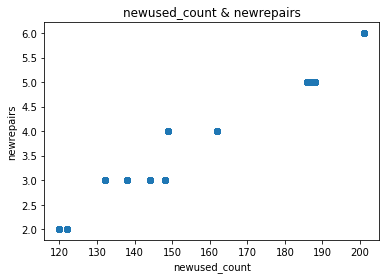

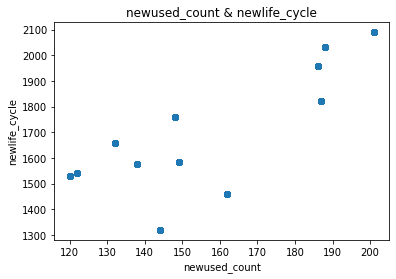

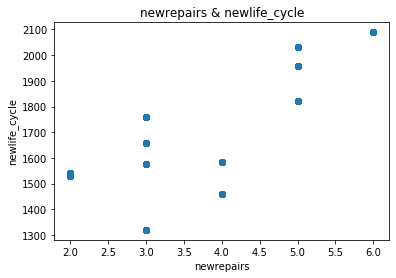

In [29]:
from matplotlib import pyplot
#绘制散点图

pyplot.scatter(newused_count,newrepairs)
pyplot.xlabel('newused_count')
pyplot.ylabel('newrepairs')
pyplot.title('newused_count & newrepairs')
pyplot.show()

a = pyplot.scatter(newused_count,newlife_cycle)
pyplot.xlabel('newused_count')
pyplot.ylabel('newlife_cycle')
pyplot.title('newused_count & newlife_cycle')
pyplot.show()

pyplot.scatter(newrepairs,newlife_cycle)
pyplot.xlabel('newrepairs')
pyplot.ylabel('newlife_cycle')
pyplot.title('newrepairs & newlife_cycle')
pyplot.show()

[[120   2]
 [144   3]
 [132   3]
 [149   4]
 [188   5]
 [122   2]
 [138   3]
 [162   4]
 [187   5]
 [148   3]
 [186   5]
 [201   6]
 [120   2]
 [144   3]
 [132   3]
 [149   4]
 [188   5]
 [122   2]
 [138   3]
 [162   4]
 [187   5]
 [148   3]
 [186   5]
 [201   6]
 [120   2]
 [144   3]
 [132   3]
 [149   4]
 [188   5]
 [122   2]
 [138   3]
 [162   4]
 [187   5]
 [148   3]
 [186   5]
 [201   6]
 [120   2]
 [144   3]
 [132   3]
 [149   4]
 [188   5]
 [122   2]
 [138   3]
 [162   4]
 [187   5]
 [148   3]
 [186   5]
 [201   6]
 [120   2]
 [144   3]
 [132   3]
 [149   4]
 [188   5]
 [122   2]
 [138   3]
 [162   4]
 [187   5]
 [148   3]
 [186   5]
 [201   6]
 [120   2]
 [144   3]
 [132   3]
 [149   4]
 [188   5]
 [122   2]
 [138   3]
 [162   4]
 [187   5]
 [148   3]
 [186   5]
 [201   6]
 [120   2]
 [144   3]
 [132   3]
 [149   4]
 [188   5]
 [122   2]
 [138   3]
 [162   4]
 [187   5]
 [148   3]
 [186   5]
 [201   6]
 [120   2]
 [144   3]
 [132   3]
 [149   4]
 [188   5]
 [122   2]
 [138   3]

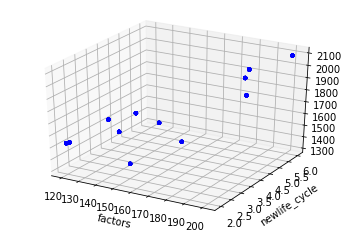

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#if a>0.85 and b>0.85 and c>0.85:
x_data = []
for num in range(len(newused_count)):
    x_data.append([newused_count[num],newrepairs[num]])
x_data = np.array(x_data)
y_data = np.array(newlife_cycle)
print(x_data)
print(y_data)
ax = plt.figure().add_subplot(111, projection = "3d")
ax.scatter(x_data[:, 0], x_data[:, 1], y_data, c = "b", marker = 'o', s = 10)
ax.set_xlabel("factors")
ax.set_ylabel("newlife_cycle")
plt.show()

In [9]:
import numpy as np
def fit(x,y):
    dinominator=0
    numerator=0
    for i in range(len(x)):
        numerator+=(x[i] - np.mean(x))*(y[i] - np.mean(y))
        dinominator += (x[i] - np.mean(x))**2
    b1=numerator/float(dinominator)
    b0=np.mean(y)/float(np.mean(x))
    return b0, b1
def predict(x, b0, b1):
    return b0 + x*b1
if a>0.85:
    b0, b1=fit(newused_count,newlife_cycle)
    x_test = input("请输入要预测的数据的使用次数：")
    x=int(x_test)
    y = predict(x, b0, b1)
    print("预测可使用（天）:", y)
    d=y

请输入要预测的数据的使用次数：145
预测可使用（天）: 993.3300754215386


In [10]:
import numpy as np
def fit(x,y):
    dinominator=0
    numerator=0
    for i in range(len(x)):
        numerator+=(x[i] - np.mean(x))*(y[i] - np.mean(y))
        dinominator += (x[i] - np.mean(x))**2
    b1=numerator/float(dinominator)
    b0=np.mean(y)/float(np.mean(x))
    return b0, b1
def predict(x, b0, b1):
    return b0 + x*b1
if b>0.85:
    b0, b1=fit(newrepairs,newlife_cycle)
    x_test = input("请输入要预测的数据的报修次数：")
    x=int(x_test)
    y = predict(x, b0, b1)
    print("预测可使用（天）:", y)
    d=y

In [22]:
from numpy import dot
from numpy.linalg import inv
from numpy import mat
def least_squares(x, y):
    #最小二乘法
    theta = dot(dot(inv(dot(x.T, x)), x.T), y)
    return theta
x=[]
y=[]
for num in range(len(newused_count)):
    x.append([newused_count[num],newrepairs[num]])
    y.append([newlife_cycle[num]])
x = mat(x)
y = mat(y)
print(least_squares(x, y))


[[  14.56657626]
 [-156.74239968]]


In [12]:
if a>0.85 and b>0.85 and c>0.85:
    an=least_squares(x, y)
    new_numbers = []
    for n in an:
        new_numbers.append(float(n))
    a=new_numbers
    print(a)
    x1 = input("请输入要预测的数据的使用次数：")
    x1 = int(x1)
    x2 = input("请输入要预测的数据的报修次数：")
    x2 = int(x2)
    y=round( x1*a[0]+ x2*a[1])
    print("预测可使用（天）:",y)
    d=y

In [13]:
import datetime
now = datetime.datetime.now()
date = now + datetime.timedelta(days = d)
print(date.strftime('%Y-%m-%d'))   

2023-04-06


In [14]:
def purity(cluster, labels, k, label_set):
    p = np.zeros((k, len(label_set)))
    purity = 0
    for i in range(len(cluster)):
        p[int(cluster[i]), label_set.index(labels[i])] += 1

    purity = sum(np.max(p, axis=1))/len(labels)

    return purity

In [15]:
def f_score(cluster, labels, label_set):
    TP, TN, FP, FN = 0, 0, 0, 0
    n = len(labels)
    # a lookup table
    for i in range(n):
        if i not in cluster:
            continue
        for j in range(i + 1, n):
            if j not in cluster:
                continue
            same_label = (labels[i] == labels[j])
            same_cluster = (cluster[i] == cluster[j])
            if same_cluster:
                if same_label:
                    TP += 1
                else:
                    FP += 1
            elif same_label:
                FN += 1
            else:
                TN += 1
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    fscore = 2 * precision * recall / (precision + recall)
    return fscore, precision, recall, TP + FP + FN + TN

In [ ]:
print("purity:",purity(dfr,newlife_cycle,len(newused_count),["newlife_cycle"]))